In [8]:
import pandas as pd
import numpy as np

In [9]:
# Load the dataset
data = pd.read_csv('environmental_socioeconomic.csv')
data.head()

,co2_emissions,waste_production,gdp,population
0,218.543053,436.276737,39199.932440,6.417631e+07
1,477.821438,399.620887,17380.479824,4.646995e+07
2,379.397274,258.538521,23865.587775,9.648535e+07
3,319.396318,646.540003,36531.225474,2.267887e+07
4,120.208388,528.961744,29283.573781,5.919779e+07


In [10]:
from sklearn.preprocessing import StandardScaler
# Normalize the features using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
# Display scaled data
print(pd.DataFrame(data_scaled, columns=data.columns).head())

   co2_emissions  waste_production       gdp  population
0      -0.415900         -0.452465  0.801884    0.482494
1       1.587377         -0.593258 -1.100359   -0.136414
2       0.826917         -1.135149 -0.534981    1.611824
3       0.363328          0.355146  0.569224   -0.968007
4      -1.175669         -0.096466 -0.062635    0.308475


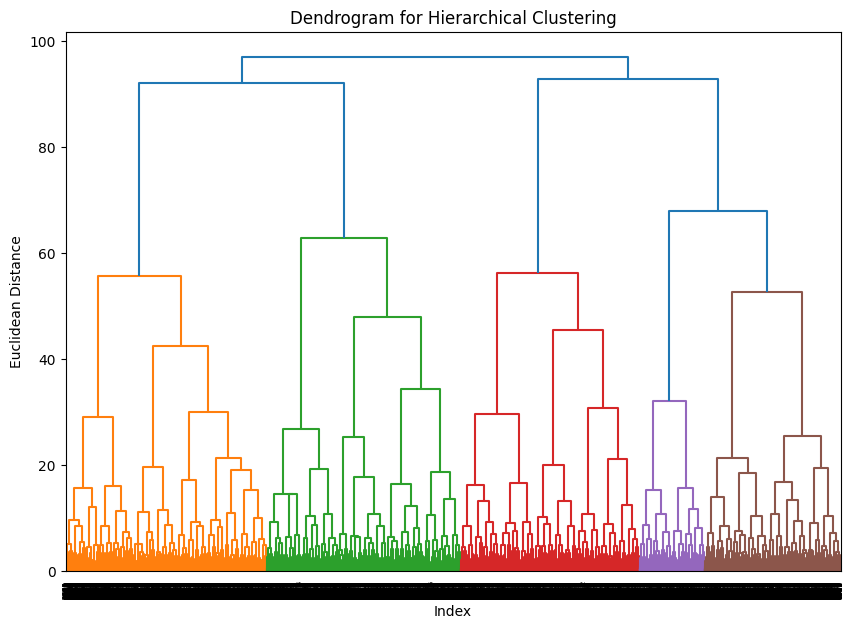

In [11]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Create a dendrogram to visualize the hierarchical clustering process
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data_scaled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Index')
plt.ylabel('Euclidean Distance')
plt.show()

- n_clusters - Stoping Criteria - final number of clusters
- ward - variance-minimizing approach

In [12]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_clustering = AgglomerativeClustering(
    n_clusters=4,
    linkage='ward'
)

data['cluster'] = hierarchical_clustering.fit_predict(data_scaled)


In [13]:
# Display the first few rows with cluster labels
print(data.head())

   co2_emissions  waste_production           gdp    population  cluster
0     218.543053        436.276737  39199.932440  6.417631e+07        3
1     477.821438        399.620887  17380.479824  4.646995e+07        2
2     379.397274        258.538521  23865.587775  9.648535e+07        2
3     319.396318        646.540003  36531.225474  2.267887e+07        1
4     120.208388        528.961744  29283.573781  5.919779e+07        1


In [14]:
from sklearn.metrics import silhouette_score
# Calculate Silhouette Score
sil_score = silhouette_score(data_scaled, data['cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.13124908918954956


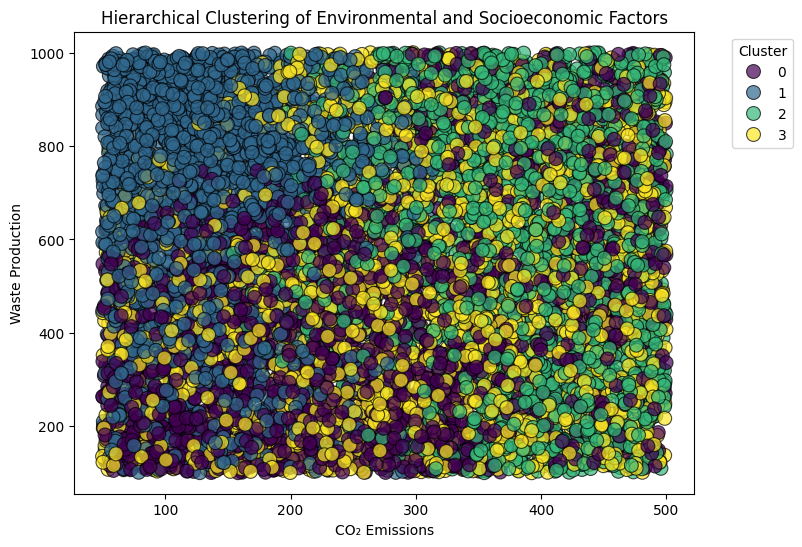

In [15]:
import seaborn as sns
# Visualize the clusters using two features: 'co2_emissions' and 'waste_production'
plt.figure(figsize=(8, 6))
# Create a scatter plot with cluster labels
sns.scatterplot(x='co2_emissions', y='waste_production', hue='cluster', 
                data=data, palette='viridis', s=100, alpha=0.7, edgecolor='k')
# Title and labels
plt.title('Hierarchical Clustering of Environmental and Socioeconomic Factors')
plt.xlabel('CO₂ Emissions')
plt.ylabel('Waste Production')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
# Display the plot
plt.show()